In [8]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau

import tensorflow as tf
import random as rn
import cv2
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [25]:
lookup = dict()
reverselookup = dict()
count = 0

for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1

x_data = []
y_data = []
resolutions = []
sizes = []
color_distributions = []
IMG_SIZE = 150
datacount = 0

for i in range(0, 10):
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/'):
                path = '../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
                size = os.path.getsize(path)
                sizes.append(size)
                # Extract the resolution of the image
                resolution = img.shape[:2]
                resolutions.append(resolution)
                color_distribution = np.bincount(img.flatten(), minlength=256)
                color_distributions.append(color_distribution)        
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)
sizes = np.array(sizes)


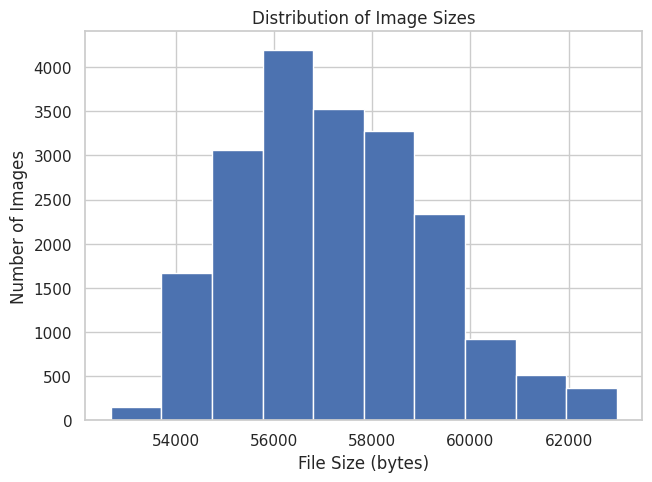

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

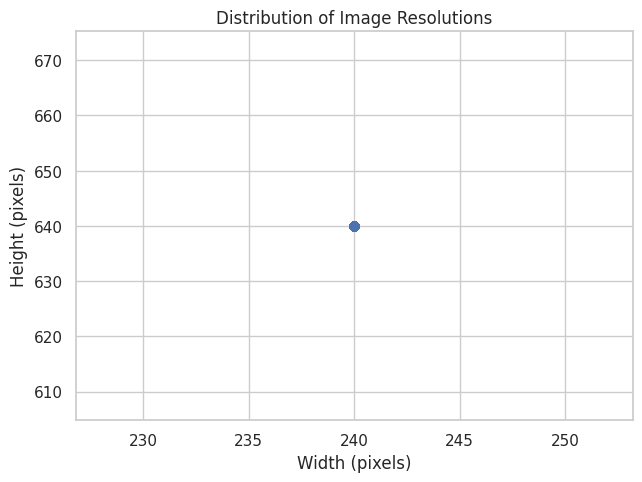

In [11]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [20]:
# Print total number of files in each folder
for i in range(10):  # Loop over the ten top-level folders
    folder_path = f'../input/leapgestrecog/leapGestRecog/0{i}/'
    total_files = sum([len(files) for _, _, files in os.walk(folder_path)])
    print(f"Total files in {folder_path}: {total_files}")

Total files in ../input/leapgestrecog/leapGestRecog/00/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/01/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/02/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/03/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/04/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/05/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/06/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/07/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/08/: 2000
Total files in ../input/leapgestrecog/leapGestRecog/09/: 2000


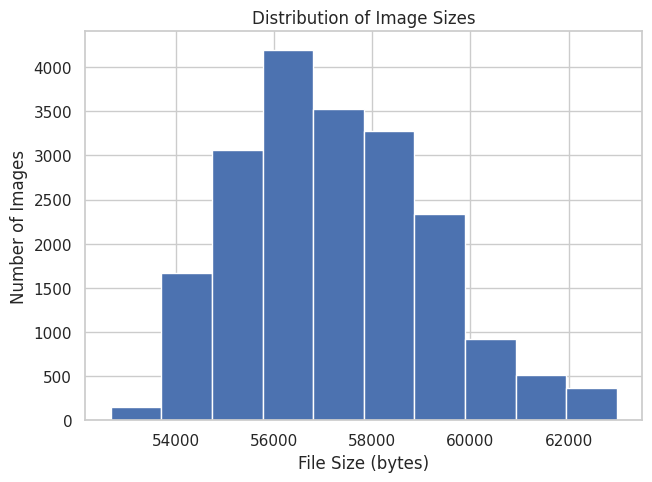

In [21]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

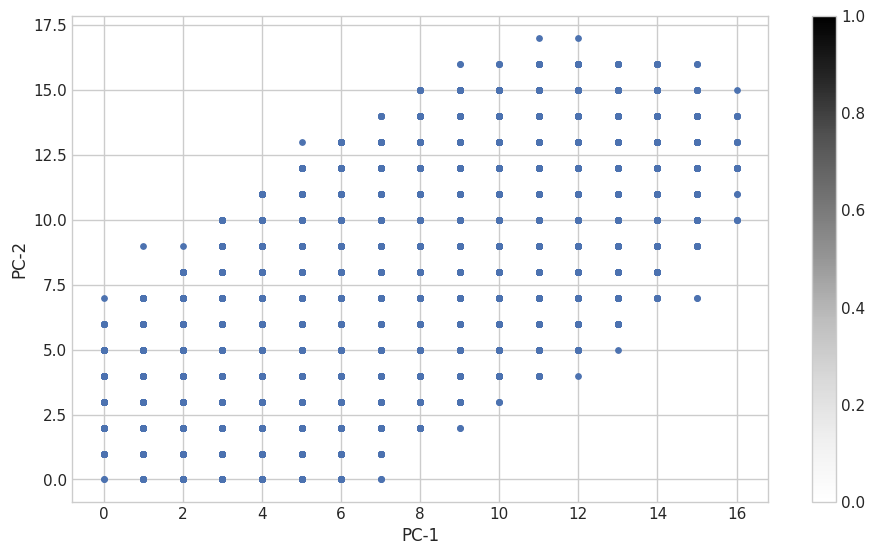

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(x_data[:, 0], x_data[:, 1], s = 15,
            cmap = c_map )
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

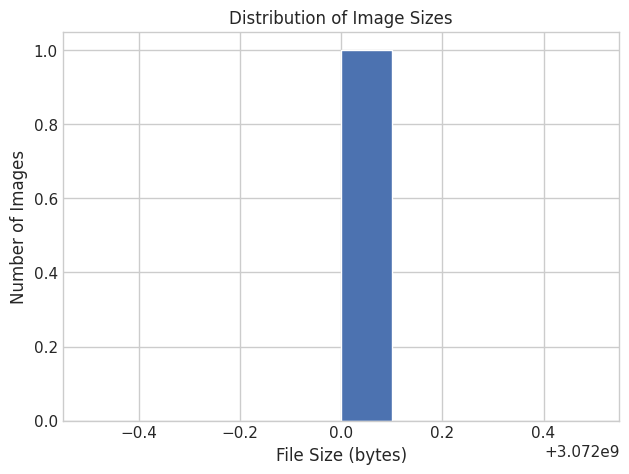

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(x_data.size)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [26]:
y_data=to_categorical(y_data)
x_data = x_data.reshape((datacount, IMG_SIZE, IMG_SIZE, 1))
x_data = x_data/255

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=42)

In [28]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [34]:
batch_size=128
epochs=100

In [35]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [36]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

In [38]:
History = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/100
117/118 [============================>.] - ETA: 0s - loss: 0.1074 - accuracy: 0.9812
Epoch 1: val_loss improved from inf to 0.00249, saving model to ./base.model
118/118 [==============================] - 13s 95ms/step - loss: 0.1072 - accuracy: 0.9812 - val_loss: 0.0025 - val_accuracy: 0.9998 - lr: 0.0010
Epoch 2/100
117/118 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9999
Epoch 2: val_loss improved from 0.00249 to 0.00062, saving model to ./base.model
118/118 [==============================] - 11s 92ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 6.2085e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/100
117/118 [============================>.] - ETA: 0s - loss: 5.9143e-04 - accuracy: 0.9999
Epoch 3: val_loss did not improve from 0.00062
118/118 [==============================] - 10s 82ms/step - loss: 5.9101e-04 - accuracy: 0.9999 - val_loss: 9.4706e-04 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 4/100
117/118 [============================>

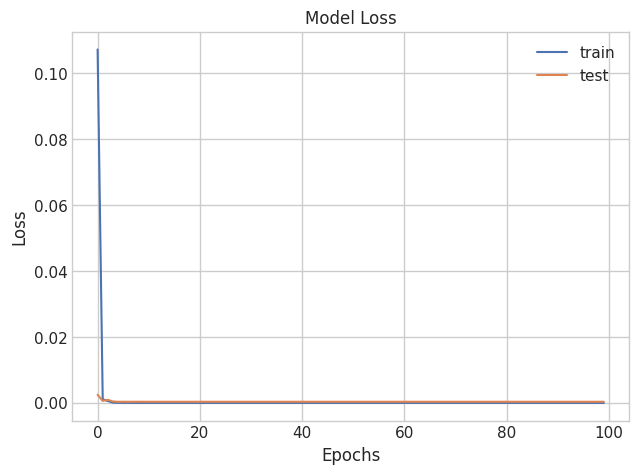

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

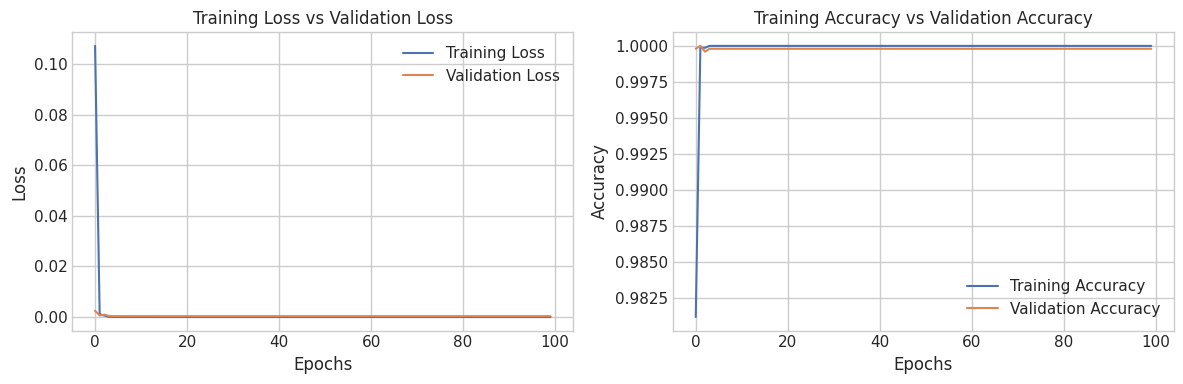

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 311ms/step


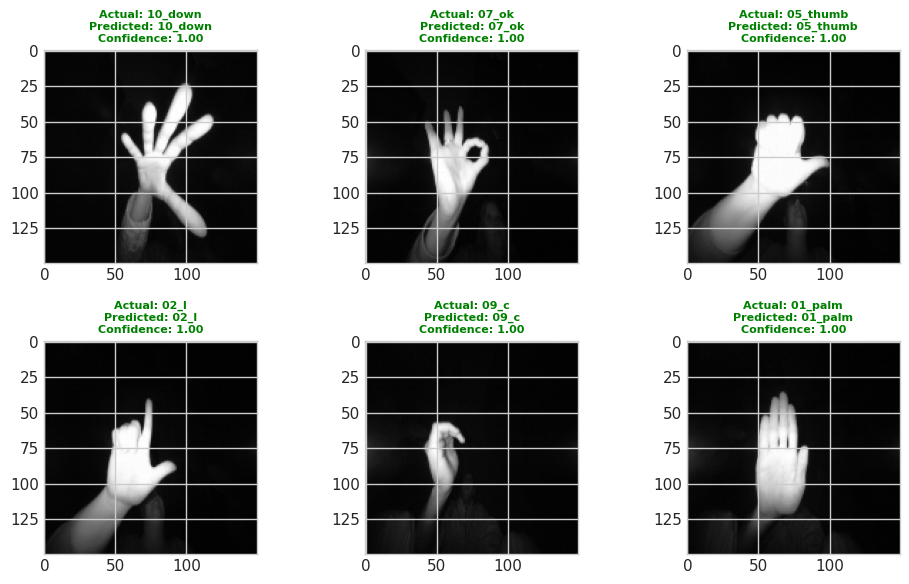

In [41]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Assuming you have a function to reverse lookup the class indices
def reverse_lookup(index):
    return reverselookup[index]

# Select random samples from the test set
num_samples_to_visualize = 6
random_indices = random.sample(range(len(x_test)), num_samples_to_visualize)
x_random_samples = x_test[random_indices]
y_random_labels = y_test[random_indices]  # Assuming y_test contains the true labels

# Make predictions on the randomly selected test samples
predictions_random = model.predict(x_random_samples)

# Visualize predictions for the randomly selected test samples in 2 rows
num_rows = 2
num_cols = num_samples_to_visualize // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        # Plot the original image
        axes[i, j].imshow(x_random_samples[index].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')

        # Print the confidence score in bold black color
        predicted_class = np.argmax(predictions_random[index])
        actual_class = np.argmax(y_random_labels[index])
        confidence = predictions_random[index][predicted_class]

        title_color = 'green' if predicted_class == actual_class else 'red'
        axes[i, j].set_title(f'Actual: {reverse_lookup(actual_class)}\nPredicted: {reverse_lookup(predicted_class)}\nConfidence: {confidence:.2f}', color=title_color, backgroundcolor='white', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

157/157 [==============================] - 1s 7ms/step


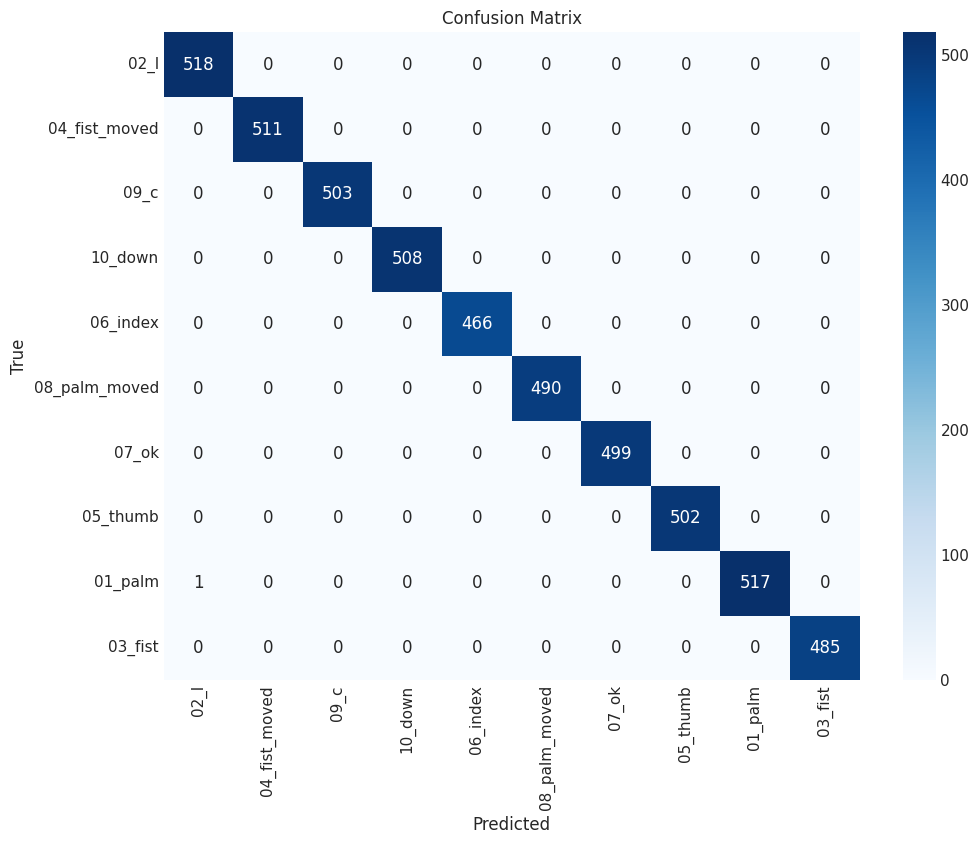

In [42]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_mat = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=reverselookup.values(),
            yticklabels=reverselookup.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

157/157 [==============================] - 1s 8ms/step - loss: 3.5961e-04 - accuracy: 0.9998
Test accuracy: 99.98%
